In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn.preprocessing import StandardScaler

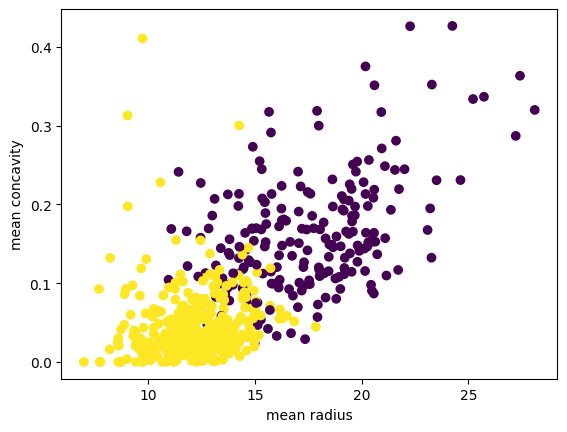

In [127]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

X_subset = X[['mean radius', 'mean concavity']]

plt.scatter(X_subset.iloc[:, 0], X_subset.iloc[:,1], c=y)
plt.xlabel('mean radius')
plt.ylabel('mean concavity')
plt.show()


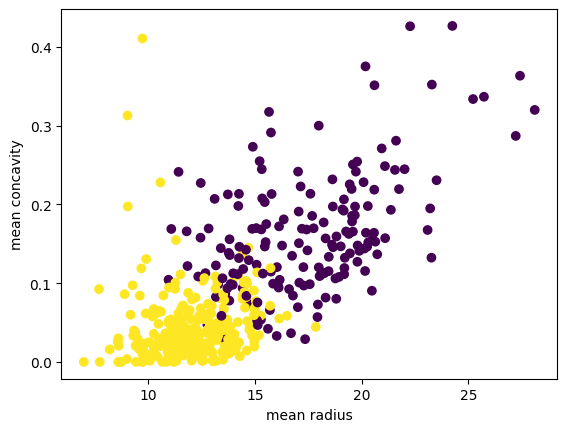

In [117]:
## Separate data into train and test.
X_train, X_test,y_train,y_test = train_test_split(X_subset,y,test_size = 0.2,random_state =50)

plt.scatter(X_train.iloc[:, 0], X_train.iloc[:,1], c = y_train)
plt.xlabel('mean radius')
plt.ylabel('mean concavity')
plt.show()

In [100]:
decision_tree=DecisionTreeClassifier(max_depth = 2, random_state = 50)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=50)

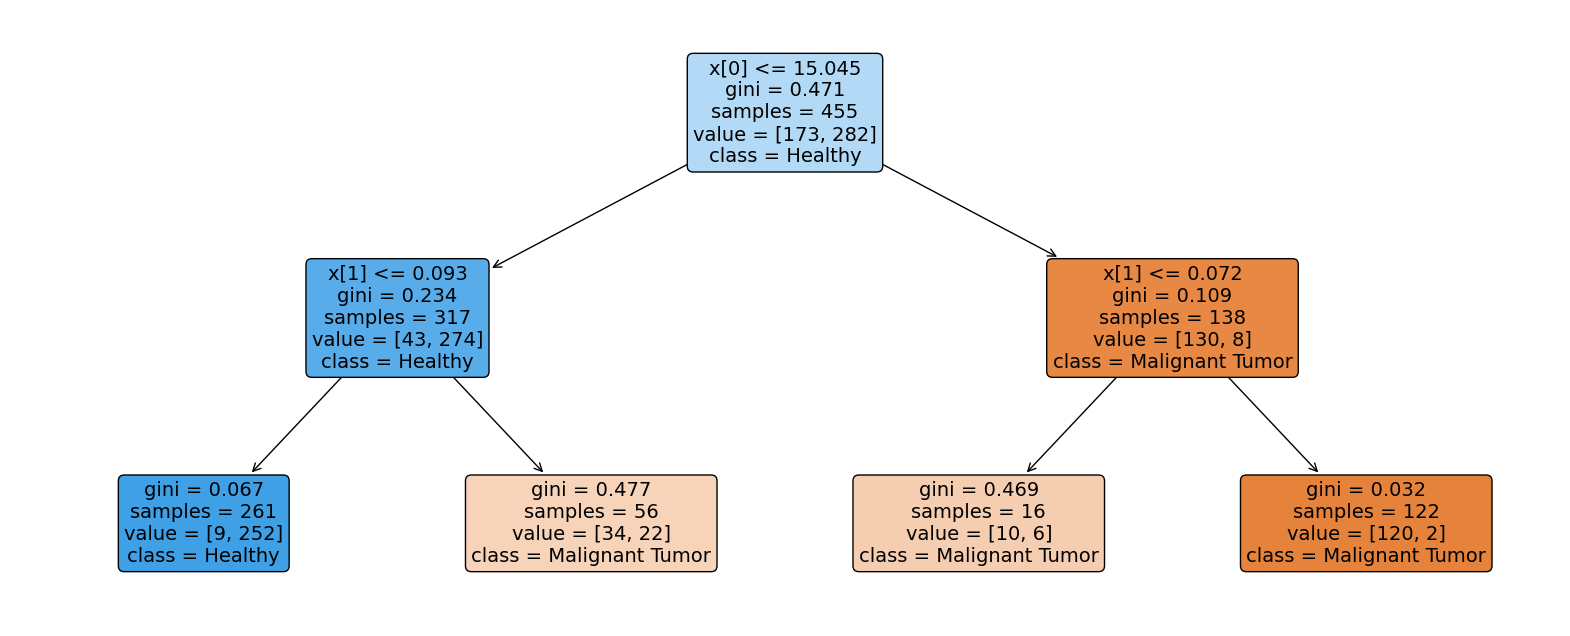

In [122]:
from sklearn import tree

# Define feature names if available
features = ["radius", "concavity"]

# Define class names if available
class_names = [ "Malignant Tumor","Healthy"]  # Example class names, replace with your actual class names

# Plot the decision tree
plt.figure(figsize = (20, 8))
tree.plot_tree(decision_tree,
               # feature_names=features,
               class_names = class_names,
               rounded = True,
               filled = True,
               fontsize = 14)
plt.show()

In [123]:
tree_rules = export_text(decision_tree,
                        feature_names = features)
print(tree_rules)

|--- radius <= 15.05
|   |--- concavity <= 0.09
|   |   |--- class: 1
|   |--- concavity >  0.09
|   |   |--- class: 0
|--- radius >  15.05
|   |--- concavity <= 0.07
|   |   |--- class: 0
|   |--- concavity >  0.07
|   |   |--- class: 0



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


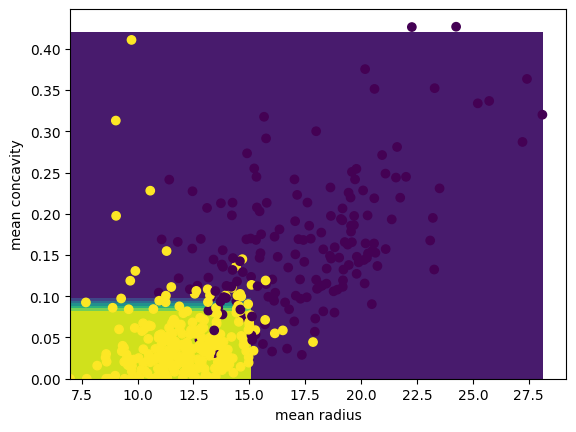

In [152]:
# Set a plot_step
plot_step = 0.02

# Plot the decision boundary
x_min, x_max = X_subset.iloc[:, 0].min(), X_subset.iloc[:, 0].max() 
y_min, y_max = X_subset.iloc[:, 1].min(), X_subset.iloc[:, 1].max() 

xx,yy= np.meshgrid(np.arange(x_min,x_max,plot_step),
                   np.arange(y_min,y_max,plot_step))

Z = decision_tree.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
cs= plt.contourf(xx,yy,Z)

plt.scatter(X_train.iloc[:, 0], X_train.iloc[:,1], c = y_train)
plt.xlabel('mean radius')
plt.ylabel('mean concavity')
plt.show()

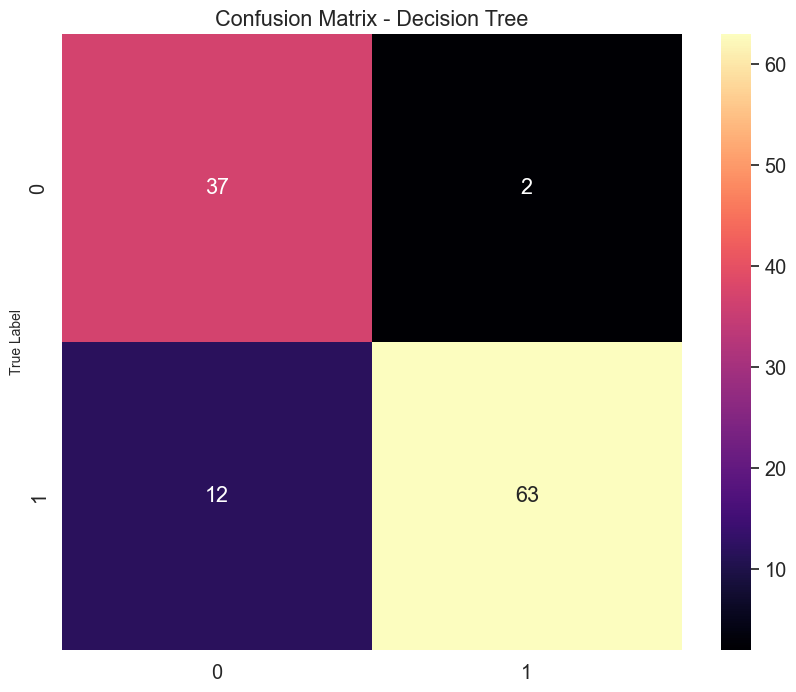

In [155]:
labels = ["radius", "concavity"]

# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn
from sklearn import metrics

# Note: visualizing your tree above will be weird after running seaborn
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)

plt.figure(figsize=(10,8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
           annot=True,
           fmt="g",
           ax=ax,
           cmap="magma")

ax.set_title("Confusion Matrix - Decision Tree")
#ax.set_xlabel(labels)
ax.set_ylabel("True Label",fontsize=10)
#ax.set_yticklabels(labels,rotation=0)
plt.show()

In [156]:
print(f"accuracy score={metrics.accuracy_score(y_test,test_pred_decision_tree)}")

accuracy score=0.8771929824561403


In [157]:
print(f"precision score")

precision = metrics.precision_score(y_test,
                                   test_pred_decision_tree,
                                   average=None)
precision_results = pd.DataFrame(precision)
precision_results.rename(columns = {0:"precision"},inplace = True)
precision_results

precision score


,precision
0,0.755102
1,0.969231


In [158]:
# Recall and the f1-score (look them up!)

print(metrics.classification_report(y_test,test_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84        39
           1       0.97      0.84      0.90        75

    accuracy                           0.88       114
   macro avg       0.86      0.89      0.87       114
weighted avg       0.90      0.88      0.88       114

